
Variable	Definition <br>
ID	Unique Identifier for a row<br>
City_Code	Code for the City of the customers<br>
Region_Code	Code for the Region of the customers<br>
Accomodation_Type	Customer Owns or Rents the house<br>
Reco_Insurance_Type	Joint or Individual type for the recommended insurance  <br>
Upper_Age	Maximum age of the customer <br>
Lower _Age	Minimum age of the customer<br>
Is_Spouse	If the customers are married to each other<br>
(in case of joint insurance) 
Health_Indicator<br>
Encoded values for health of the customer
Holding_Policy_Duration	Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)<br>
Holding_Policy_Type<br>
Type of holding policy<br>
Reco_Policy_Cat	Encoded value for recommended health insurance<br>
Reco_Policy_Premium	Annual Premium (INR) for the recommended health insurance<br>
Response (Target)	<br>
    0 : Customer did not show interest in the recommended policy,<br>
    1 : Customer showed interest in the recommended policy<br>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")


In [3]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')

In [75]:
train_df.head(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [76]:
train_df.shape

(50882, 14)

In [77]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [78]:
train_df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [79]:
test_df.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

<h3> Our test also contains null values </h3>


In [80]:
train_df['Response'].value_counts()


0    38673
1    12209
Name: Response, dtype: int64

In [81]:
train_df['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [82]:
train_df['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [83]:
train_df['Health Indicator'].isnull().sum()

11691

In [84]:
train_df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [85]:
train_df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

<AxesSubplot:>

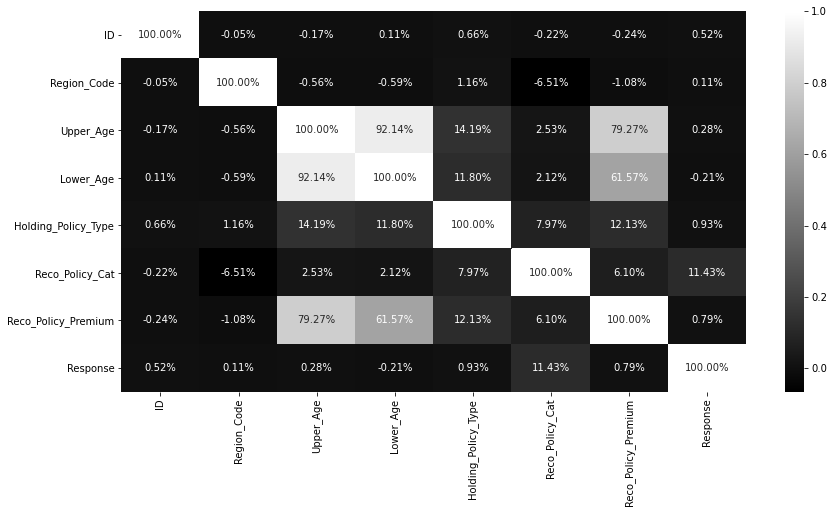

In [87]:
plt.figure(figsize=(14,7))
sns.heatmap(train_df.corr(),cmap='gist_gray',fmt='0.2%', annot=True)

<h5> First we predict the missing values of health Indicator </h5

--------------------------------------------->>>>>>>>>>>>>>>>>>>>>>>>>>>

## Making of training dataset 

In [100]:
train_df['Accomodation_Type'] = train_df['Accomodation_Type'].map({'Rented' :0, 'Owned':1})
dummy = pd.get_dummies(train_df['Accomodation_Type'], drop_first=True,prefix='Accomodation')
train_df = pd.concat([train_df, dummy] , axis=1)
train_df.drop('Accomodation_Type',axis=1,inplace=True)

In [101]:
train_df['Is_Spouse'] = train_df['Is_Spouse'].map({'No' :0, 'Yes':1})
dummy = pd.get_dummies(train_df['Is_Spouse'], drop_first=True,prefix='Is_Spouse')
train_df = pd.concat([train_df, dummy] , axis=1)
train_df.drop('Is_Spouse',axis=1,inplace=True)

In [102]:
train_df['Reco_Insurance_Type'] = train_df['Reco_Insurance_Type'].map({'No' :0, 'Yes':1})
dummy = pd.get_dummies(train_df['Reco_Insurance_Type'], drop_first=True,prefix='Reco_Insurance_Type')
train_df = pd.concat([train_df, dummy] , axis=1)
train_df.drop('Reco_Insurance_Type',axis=1,inplace=True)

In [103]:
train_df.drop('ID', axis=1, inplace=True)


In [104]:
train_df.head(4)

,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_1,Is_Spouse_1
0,C3,3213,36,36,X1,14+,3.0,22,11628.0,0,0,0
1,C5,1117,75,22,X2,NaN,NaN,22,30510.0,0,1,0
2,C5,3732,32,32,NaN,1.0,1.0,19,7450.0,1,1,0
3,C24,4378,52,48,X1,14+,3.0,19,17780.0,0,1,0


In [105]:
train_df['Holding_Policy_Type'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [106]:
num =  [col for col in train_df.columns if train_df[col].dtypes != 'O']

In [107]:
num

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response',
 'Accomodation_1',
 'Is_Spouse_1']

In [108]:
train_df

,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_1,Is_Spouse_1
0,C3,3213,36,36,X1,14+,3.0,22,11628.0,0,0,0
1,C5,1117,75,22,X2,NaN,NaN,22,30510.0,0,1,0
2,C5,3732,32,32,NaN,1.0,1.0,19,7450.0,1,1,0
3,C24,4378,52,48,X1,14+,3.0,19,17780.0,0,1,0
4,C8,2190,44,44,X2,3.0,1.0,16,10404.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,22,22,X3,NaN,NaN,18,7704.0,0,0,0
50878,C5,4188,27,27,X3,7.0,3.0,4,5408.0,0,0,0
50879,C1,442,63,63,X2,14+,1.0,12,11374.0,0,0,0
50880,C1,4,71,49,X2,2.0,2.0,16,28179.2,1,1,0


In [109]:
train_df.corr()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_1,Is_Spouse_1
Region_Code,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121,-0.009105,-0.002567
Upper_Age,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772,0.419129,0.202947
Lower_Age,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099,0.369400,0.062634
Holding_Policy_Type,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297,0.151030,0.090459
Reco_Policy_Cat,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321,0.022055,0.022676
Reco_Policy_Premium,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943,0.350514,0.514727
Response,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000,0.005201,0.003859
Accomodation_1,-0.009105,0.419129,0.369400,0.151030,0.022055,0.350514,0.005201,1.000000,0.191045
Is_Spouse_1,-0.002567,0.202947,0.062634,0.090459,0.022676,0.514727,0.003859,0.191045,1.000000


In [110]:
dummy_data = train_df.copy()

In [111]:
col = ['Upper_Age','Lower_Age','Accomodation_1','Reco_Policy_Cat','Reco_Policy_Premium','Holding_Policy_Type','Is_Spouse_1']

In [112]:
from sklearn.ensemble import RandomForestClassifier

df = train_df[col]
test_df = df[df["Holding_Policy_Type"].isnull()]
df = df.dropna()

y_train = df["Holding_Policy_Type"]
X_train = df.drop("Holding_Policy_Type", axis=1)
X_test = test_df.drop("Holding_Policy_Type", axis=1)

#train model to fit dataset and predict missing values from column "Age"
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#replace the missing values with predicted values
dummy_data.loc[dummy_data.Holding_Policy_Type.isnull(), 'Holding_Policy_Type'] = y_pred

In [113]:
dummy_data['Holding_Policy_Type'].value_counts()

3.0    22208
1.0    14185
2.0     8083
4.0     6406
Name: Holding_Policy_Type, dtype: int64

In [114]:
col = ['Upper_Age','Lower_Age','Accomodation_1','Reco_Policy_Cat','Reco_Policy_Premium','Holding_Policy_Type','Is_Spouse_1','Holding_Policy_Duration']
df = dummy_data[col]
test_df = df[df["Holding_Policy_Duration"].isnull()]
df = df.dropna()

y_train = df["Holding_Policy_Duration"]
X_train = df.drop("Holding_Policy_Duration", axis=1)
X_test = test_df.drop("Holding_Policy_Duration", axis=1)

#train model to fit dataset and predict missing values from column 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#replace the missing values with predicted values
dummy_data.loc[dummy_data.Holding_Policy_Duration.isnull(), 'Holding_Policy_Duration'] = y_pred

In [115]:
dummy_data['Holding_Policy_Duration'].value_counts()

1.0     10604
2.0      7789
14+      6564
3.0      5913
4.0      4328
5.0      3465
6.0      2731
7.0      2337
8.0      1819
9.0      1526
10.0     1076
11.0      735
12.0      694
13.0      673
14.0      628
Name: Holding_Policy_Duration, dtype: int64

In [116]:
dummy_data.isnull().sum()

City_Code                      0
Region_Code                    0
Upper_Age                      0
Lower_Age                      0
Health Indicator           11691
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
Accomodation_1                 0
Is_Spouse_1                    0
dtype: int64

In [117]:
dummy_data2 = dummy_data.copy()

In [118]:
col = ['Upper_Age','Lower_Age','Accomodation_1','Reco_Policy_Cat','Reco_Policy_Premium','Holding_Policy_Type','Is_Spouse_1','Health Indicator']
df = dummy_data[col]
test_df = df[df["Health Indicator"].isnull()]
df = df.dropna()

y_train = df["Health Indicator"]
X_train = df.drop("Health Indicator", axis=1)
X_test = test_df.drop("Health Indicator", axis=1)

#train model to fit dataset and predict missing values from column 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#replace the missing values with predicted values
dummy_data.loc[dummy_data['Health Indicator'].isnull(), 'Health Indicator'] = y_pred

In [119]:
dummy_data['Health Indicator'].value_counts()

X1    17384
X2    13705
X3     8546
X4     7268
X5     2073
X6     1520
X7      224
X8       91
X9       71
Name: Health Indicator, dtype: int64

In [129]:
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()
ohe.fit(dummy_data['Health Indicator'])
dummy_data['Health Indicator'] = ohe.transform(dummy_data['Health Indicator'])

In [130]:
dummy_data['Health Indicator']

0        0
1        1
2        0
3        0
4        1
        ..
50877    2
50878    2
50879    1
50880    1
50881    2
Name: Health Indicator, Length: 50882, dtype: int32

In [134]:
one_hot_encoded = pd.get_dummies(dummy_data['Holding_Policy_Duration'],drop_first=True)

In [135]:
one_hot_encoded

,10.0,11.0,12.0,13.0,14+,14.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50878,0,0,0,0,0,0,0,0,0,0,0,1,0,0
50879,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50880,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [138]:
processed_data = pd.concat([dummy_data,one_hot_encoded], axis=1)


In [140]:
processed_data.head(4)

,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,14+,14.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,C3,3213,36,36,0,14+,3.0,22,11628.0,0,...,1,0,0,0,0,0,0,0,0,0
1,C5,1117,75,22,1,2.0,1.0,22,30510.0,0,...,0,0,1,0,0,0,0,0,0,0
2,C5,3732,32,32,0,1.0,1.0,19,7450.0,1,...,0,0,0,0,0,0,0,0,0,0
3,C24,4378,52,48,0,14+,3.0,19,17780.0,0,...,1,0,0,0,0,0,0,0,0,0


In [141]:
health_encoded = pd.get_dummies(dummy_data['Health Indicator'],drop_first=True)

In [143]:
final_data = pd.concat([processed_data,health_encoded],axis=1)

In [145]:
final_data.head(4)

,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,8.0,9.0,1,2,3,4,5,6,7,8
0,C3,3213,36,36,0,14+,3.0,22,11628.0,0,...,0,0,0,0,0,0,0,0,0,0
1,C5,1117,75,22,1,2.0,1.0,22,30510.0,0,...,0,0,1,0,0,0,0,0,0,0
2,C5,3732,32,32,0,1.0,1.0,19,7450.0,1,...,0,0,0,0,0,0,0,0,0,0
3,C24,4378,52,48,0,14+,3.0,19,17780.0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
final_data.drop(['Holding_Policy_Duration','Health Indicator'],axis=1,inplace=True)

In [148]:
final_data

,City_Code,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_1,Is_Spouse_1,...,8.0,9.0,1,2,3,4,5,6,7,8
0,C3,3213,36,36,3.0,22,11628.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C5,1117,75,22,1.0,22,30510.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,C5,3732,32,32,1.0,19,7450.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,C24,4378,52,48,3.0,19,17780.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,C8,2190,44,44,1.0,16,10404.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,22,22,4.0,18,7704.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
50878,C5,4188,27,27,3.0,4,5408.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
50879,C1,442,63,63,1.0,12,11374.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
50880,C1,4,71,49,2.0,16,28179.2,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [177]:
final_data.to_csv('final_data.csv',index=False)

<AxesSubplot:>

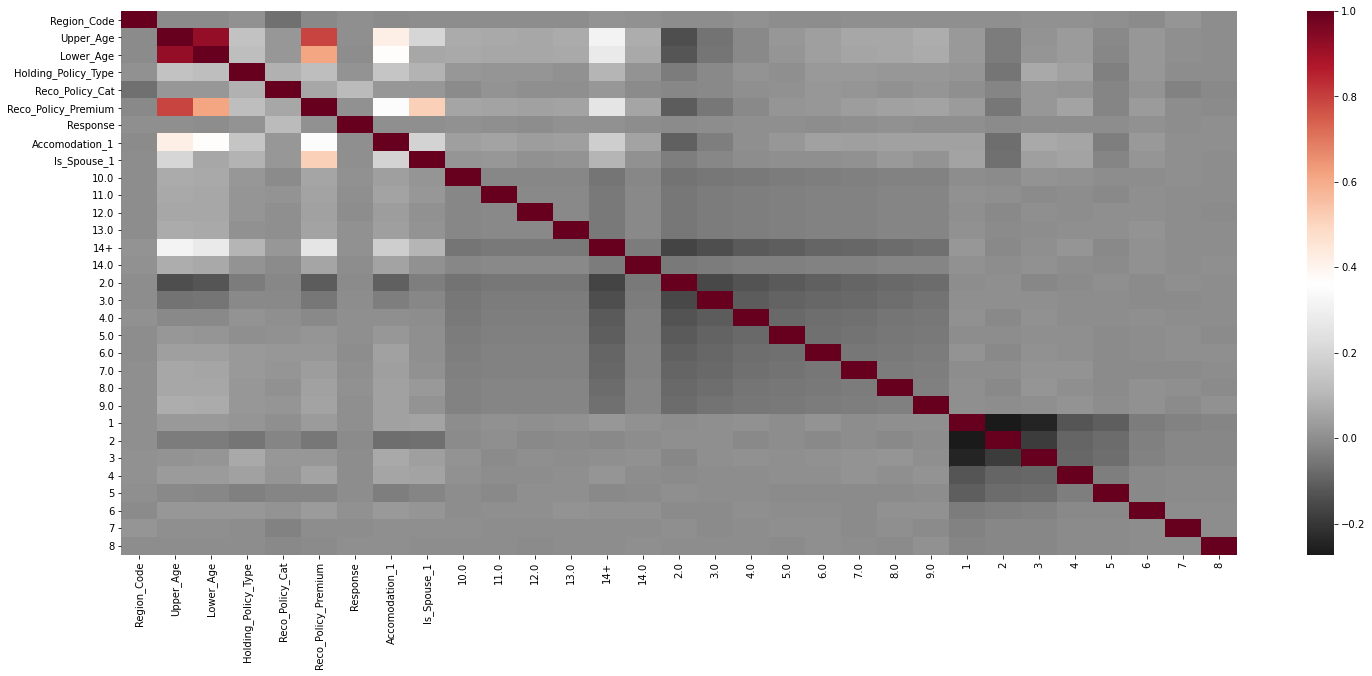

In [156]:
plt.figure(figsize=(25,10))
sns.heatmap(final_data.corr(),cmap='RdGy_r')

## Making of test dataset 

In [179]:
test_df = pd.read_csv('input/test.csv')

test_df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [180]:
test_df['Accomodation_Type'] = test_df['Accomodation_Type'].map({'Rented' :0, 'Owned':1})
dummy = pd.get_dummies(test_df['Accomodation_Type'], drop_first=True,prefix='Accomodation')
test_df = pd.concat([test_df, dummy] , axis=1)
test_df.drop('Accomodation_Type',axis=1,inplace=True)


test_df['Is_Spouse'] = test_df['Is_Spouse'].map({'No' :0, 'Yes':1})
dummy = pd.get_dummies(test_df['Is_Spouse'], drop_first=True,prefix='Is_Spouse')
test_df = pd.concat([test_df, dummy] , axis=1)
test_df.drop('Is_Spouse',axis=1,inplace=True)

test_df['Reco_Insurance_Type'] = test_df['Reco_Insurance_Type'].map({'No' :0, 'Yes':1})
dummy = pd.get_dummies(test_df['Reco_Insurance_Type'], drop_first=True,prefix='Reco_Insurance_Type')
test_df = pd.concat([test_df, dummy] , axis=1)
test_df.drop('Reco_Insurance_Type',axis=1,inplace=True)

In [181]:
test_df.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Upper_Age                     0
Lower_Age                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Accomodation_1                0
Is_Spouse_1                   0
dtype: int64

In [182]:
dummy_data_test = test_df.copy()

In [183]:
dummy_data_test.head(4)

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_1,Is_Spouse_1
0,50883,C1,156,30,30,NaN,6.0,3.0,5,11934.0,1,0
1,50884,C4,7,69,68,X1,3.0,3.0,18,32204.8,1,1
2,50885,C1,564,28,28,X3,2.0,4.0,17,9240.0,0,0
3,50886,C3,1177,23,23,X3,3.0,3.0,18,9086.0,0,0


In [184]:
from sklearn.ensemble import RandomForestClassifier

col = ['Upper_Age','Lower_Age','Accomodation_1','Reco_Policy_Cat','Reco_Policy_Premium','Holding_Policy_Type','Is_Spouse_1']
df = test_df[col]
test_df = df[df["Holding_Policy_Type"].isnull()]
df = df.dropna()

y_train = df["Holding_Policy_Type"]
X_train = df.drop("Holding_Policy_Type", axis=1)
X_test = test_df.drop("Holding_Policy_Type", axis=1)

#train model to fit dataset and predict missing values from column "Age"
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#replace the missing values with predicted values
dummy_data_test.loc[dummy_data_test.Holding_Policy_Type.isnull(), 'Holding_Policy_Type'] = y_pred

In [185]:
dummy_data_test

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_1,Is_Spouse_1
0,50883,C1,156,30,30,NaN,6.0,3.0,5,11934.0,1,0
1,50884,C4,7,69,68,X1,3.0,3.0,18,32204.8,1,1
2,50885,C1,564,28,28,X3,2.0,4.0,17,9240.0,0,0
3,50886,C3,1177,23,23,X3,3.0,3.0,18,9086.0,0,0
4,50887,C1,951,75,75,X3,NaN,3.0,5,22534.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,45,45,X1,4.0,1.0,18,15884.0,1,0
21801,72684,C4,266,59,59,X5,6.0,3.0,18,21390.0,1,0
21802,72685,C12,2470,74,74,X3,NaN,3.0,1,17836.0,1,0
21803,72686,C10,1676,25,25,X4,3.0,1.0,19,11568.0,0,0


In [186]:
col = ['Upper_Age','Lower_Age','Accomodation_1','Reco_Policy_Cat','Reco_Policy_Premium','Holding_Policy_Type','Is_Spouse_1','Holding_Policy_Duration']
df = dummy_data_test[col]
test_df = df[df["Holding_Policy_Duration"].isnull()]
df = df.dropna()

y_train = df["Holding_Policy_Duration"]
X_train = df.drop("Holding_Policy_Duration", axis=1)
X_test = test_df.drop("Holding_Policy_Duration", axis=1)

#train model to fit dataset and predict missing values from column 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#replace the missing values with predicted values
dummy_data_test.loc[dummy_data_test.Holding_Policy_Duration.isnull(), 'Holding_Policy_Duration'] = y_pred

In [188]:
dummy_data_test_copy = dummy_data_test.copy()

In [189]:
col = ['Upper_Age','Lower_Age','Accomodation_1','Reco_Policy_Cat','Reco_Policy_Premium','Holding_Policy_Type','Is_Spouse_1','Health Indicator']
df = dummy_data_test[col]
test_df = df[df["Health Indicator"].isnull()]
df = df.dropna()

y_train = df["Health Indicator"]
X_train = df.drop("Health Indicator", axis=1)
X_test = test_df.drop("Health Indicator", axis=1)

#train model to fit dataset and predict missing values from column 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#replace the missing values with predicted values
dummy_data_test.loc[dummy_data_test['Health Indicator'].isnull(), 'Health Indicator'] = y_pred

In [190]:
from sklearn.preprocessing import LabelEncoder
processed_data = pd.concat([dummy_data,one_hot_encoded], axis=1)
ohe = LabelEncoder()
ohe.fit(dummy_data_test['Health Indicator'])
dummy_data_test['Health Indicator'] = ohe.transform(dummy_data_test['Health Indicator'])

In [192]:
one_hot_encoded_test = pd.get_dummies(dummy_data_test['Holding_Policy_Duration'],drop_first=True)

In [200]:
processed_data_test = pd.concat([dummy_data_test,one_hot_encoded_test], axis=1)

In [201]:
health_encoded_test = pd.get_dummies(dummy_data_test['Health Indicator'],drop_first=True)

In [202]:
final_data_test = pd.concat([processed_data_test,health_encoded_test],axis=1)

In [203]:
final_data_test

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,...,8.0,9.0,1,2,3,4,5,6,7,8
0,50883,C1,156,30,30,4,6.0,3.0,5,11934.0,...,0,0,0,0,0,1,0,0,0,0
1,50884,C4,7,69,68,0,3.0,3.0,18,32204.8,...,0,0,0,0,0,0,0,0,0,0
2,50885,C1,564,28,28,2,2.0,4.0,17,9240.0,...,0,0,0,1,0,0,0,0,0,0
3,50886,C3,1177,23,23,2,3.0,3.0,18,9086.0,...,0,0,0,1,0,0,0,0,0,0
4,50887,C1,951,75,75,2,14+,3.0,5,22534.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,45,45,0,4.0,1.0,18,15884.0,...,0,0,0,0,0,0,0,0,0,0
21801,72684,C4,266,59,59,4,6.0,3.0,18,21390.0,...,0,0,0,0,0,1,0,0,0,0
21802,72685,C12,2470,74,74,2,3.0,3.0,1,17836.0,...,0,0,0,1,0,0,0,0,0,0
21803,72686,C10,1676,25,25,3,3.0,1.0,19,11568.0,...,0,0,0,0,1,0,0,0,0,0


In [204]:
final_data_test.drop(['Holding_Policy_Duration','Health Indicator'],axis=1,inplace=True)

In [206]:
final_data_test.to_csv('final_data_test.csv',index=False)

In [155]:
train_df = pd.read_csv('final_data_train.csv')
test_df = pd.read_csv('final_data_test.csv')

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df['City_Code'])
train_df['City_Code'] = le.transform(train_df['City_Code'])

In [83]:
test_df['City_Code'] = le.transform(test_df['City_Code'])

In [85]:
train_df.to_csv('final_data_train.csv',index=False)
test_df.to_csv('final_data_test.csv',index=False)

In [106]:
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [131]:

X = train_df.drop(['Response'],axis=1)
y = train_df.Response


In [53]:
ID_col = test_df.ID

In [132]:
test_df.drop('ID', axis=1, inplace=True)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [121]:
rf = DecisionTreeClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [122]:
roc_auc_score(y_test, y_pred)

0.5404918544377093

# For the test that we get  from site 

In [133]:
rf = DecisionTreeClassifier()
rf.fit(X, y)
y_pred = rf.predict(test_df)


In [56]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [134]:
prob = rf.predict_proba(test_df)

In [58]:
prob = prob[:, 1]

In [59]:
final_csv = pd.DataFrame(list(zip(ID_col,prob)) ,columns =['ID', 'Response']) 

In [62]:
final_csv.to_csv('final_submission_with_rf.csv',index=False)

In [63]:
def make_csv(name , ID_col, prob):
    prob = prob[:, 1]
    final_csv = pd.DataFrame(list(zip(ID_col,prob)) ,columns =['ID', 'Response'])
    final_csv.to_csv(name,index=False)

In [135]:
make_csv('final_submission_with_dtc.csv',ID_col, prob)

In [141]:
train_df[train_df.corr() >= 0.2]

,City_Code,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_1,Is_Spouse_1,...,8.0,9.0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

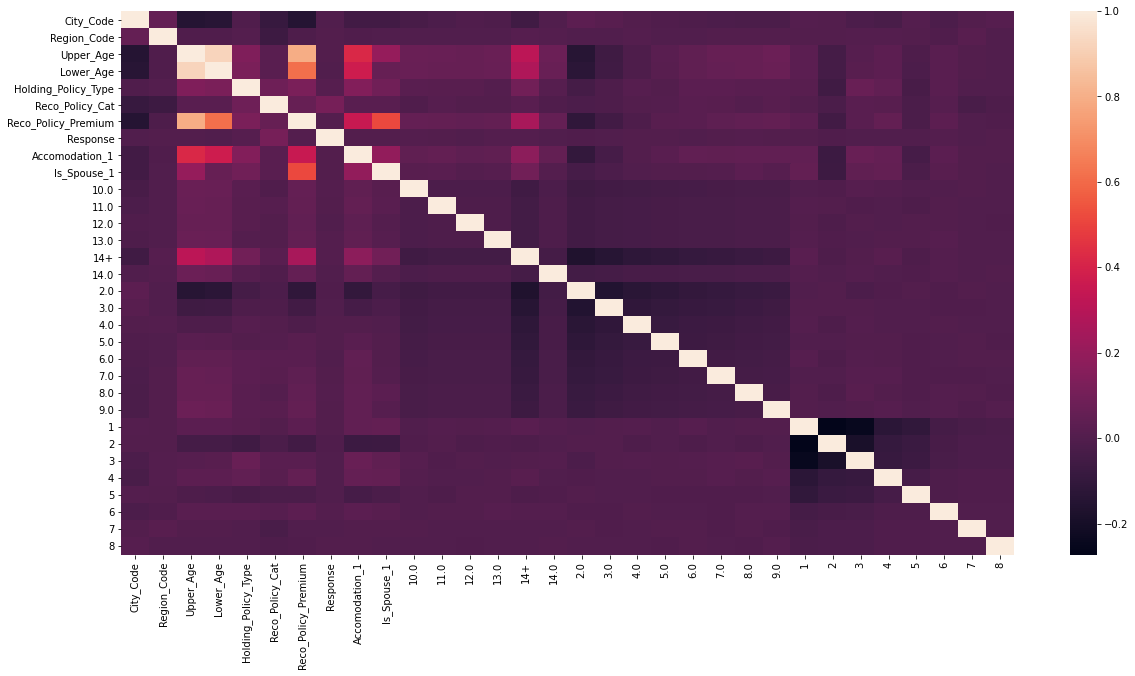

In [138]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr())

In [142]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [143]:
corr_features = correlation(train_df, 0.7)

In [144]:
corr_features

{'Lower_Age', 'Reco_Policy_Premium'}

In [160]:
X_temp = train_df.drop(['Response','Lower_Age', 'Reco_Policy_Premium'],axis=1)
y_temp = train_df.Response
# X_test_temp = test_df.drop(['ID','Lower_Age', 'Reco_Policy_Premium'],axis=1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

In [170]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
y_pred = y_pred[:,1]

In [171]:
roc_auc_score(y_test,y_pred)

0.6183411549902171

In [168]:
classification_report(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [159]:
make_csv('with_correlation_FE.csv', ID_col, prob)

In [150]:
X_temp

,City_Code,Region_Code,Upper_Age,Holding_Policy_Type,Reco_Policy_Cat,Accomodation_1,Is_Spouse_1,10.0,11.0,12.0,...,8.0,9.0,1,2,3,4,5,6,7,8
0,22,3213,36,3.0,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,1117,75,1.0,22,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,31,3732,32,1.0,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,4378,52,3.0,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,2190,44,1.0,16,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,30,845,22,4.0,18,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
50878,31,4188,27,3.0,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
50879,0,442,63,1.0,12,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
50880,0,4,71,2.0,16,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
len(train_df['City_Code'].unique())

36

In [10]:
len(test_df['City_Code'].unique())

36

In [12]:
len(train_df['Region_Code']

5316

In [13]:
len(test_df['Region_Code'].unique())

4694

In [14]:
len(train_df['Holding_Policy_Type'].unique()),len(test_df['Holding_Policy_Type'].unique())

(5, 5)